In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors


df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
null_numbers = df.isnull().sum()
null_numbers = null_numbers.sort_values(ascending=False)
null_numbers

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [8]:
procent_null = df.isnull().mean() * 100
procent_null.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

In [9]:
df_number = len(df)
print(f'Количество строк: {df_number}')

Количество строк: 891


In [10]:
duplicates_number = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates_number}')

Количество дубликатов: 0


In [11]:
df_deduped = df.drop_duplicates()
print(f'Количество строк после удаления дубликатов: {len(df_deduped)}')

Количество строк после удаления дубликатов: 891


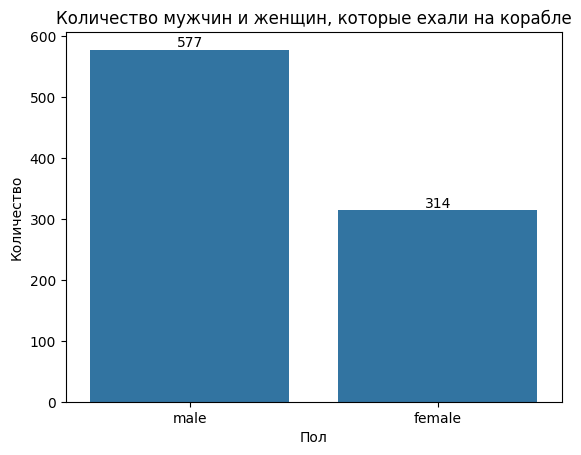

In [12]:
ax = sns.countplot(data=df, x='Sex')
plt.title('Количество мужчин и женщин, которые ехали на корабле')
plt.xlabel('Пол')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='bottom',)
plt.show()

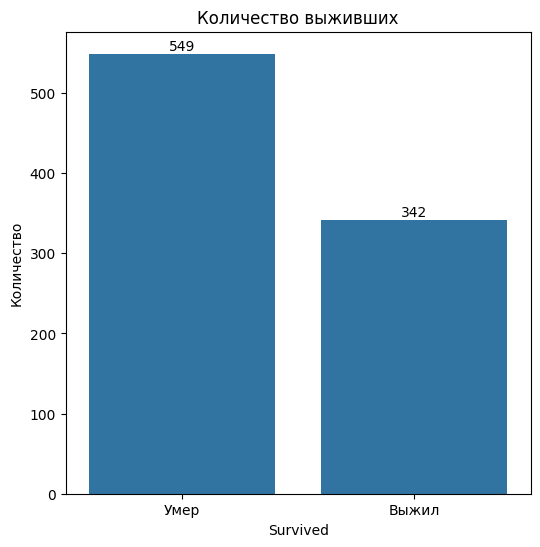

In [13]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='Survived')
plt.title('Количество выживших')
plt.xticks([0, 1], ['Умер', 'Выжил'])
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='bottom',)
plt.show()

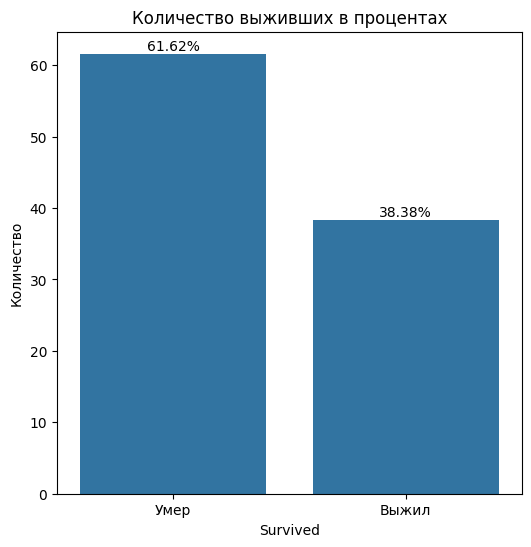

In [14]:
procent_alive = df['Survived'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=procent_alive.index, y=procent_alive.values)
plt.title('Количество выживших в процентах')
plt.xticks([0, 1], ['Умер', 'Выжил'])
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='bottom',)
plt.show()

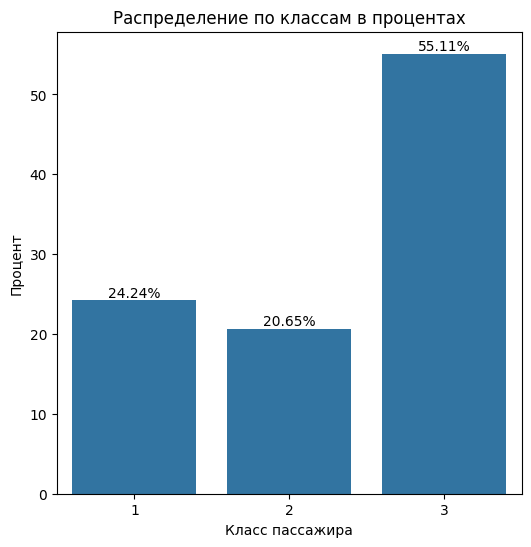

In [15]:
class_passager = df['Pclass'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=class_passager.index, y=class_passager.values)
plt.title('Распределение по классам в процентах')
plt.xlabel('Класс пассажира')
plt.xticks([0, 1, 2], [1, 2, 3])
plt.ylabel('Процент')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='bottom',)
plt.show()


In [16]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

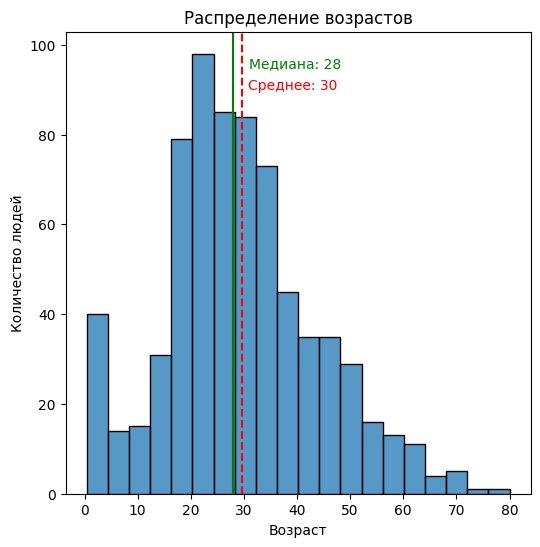

In [17]:
plt.figure(figsize=(6, 6))

ax = sns.histplot(data = df, x='Age')
plt.title('Распределение возрастов')
plt.axvline(mean_age, color='red', linestyle='--')
plt.axvline(median_age, color='green', linestyle='-')
plt.text(mean_age + 1, 90, f'Среднее: {mean_age:.0f}', color='red')
plt.text(median_age + 3, 95, f'Медиана: {median_age:.0f}', color='green')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

In [18]:
df_corr = df[['SibSp', 'Parch']]
corr_matrix = df_corr.corr()

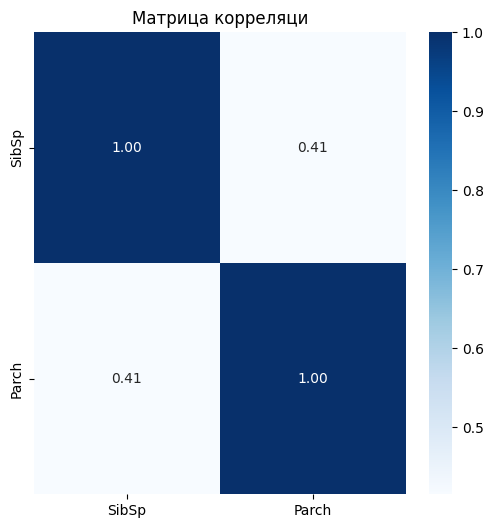

In [19]:
plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",      
    cmap="Blues",    
)
plt.title("Матрица корреляци")
plt.show()

In [20]:
pearson_corr, pearson_pval = pearsonr(df['SibSp'], df['Parch'])
print(f'Корреляция Пирсона: {pearson_corr:.2f}\np-value: {pearson_pval:.5f}')

Корреляция Пирсона: 0.41
p-value: 0.00000


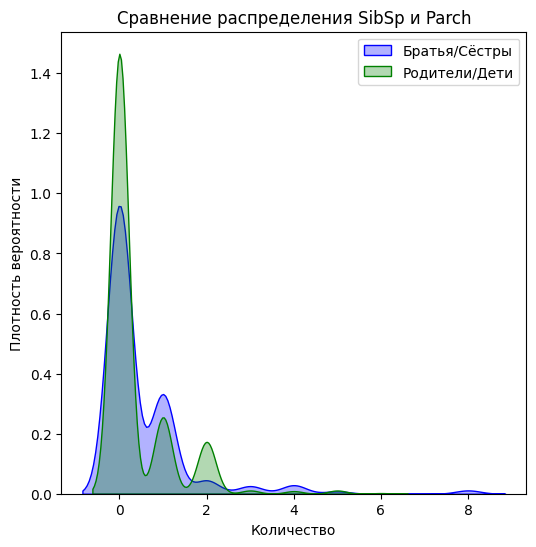

In [21]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data=df, x='SibSp', label='Братья/Сёстры', fill=True, alpha=0.3, color='blue')
sns.kdeplot(data=df, x='Parch', label='Родители/Дети', fill=True, alpha=0.3, color='green')
plt.title('Сравнение распределения SibSp и Parch')
plt.xlabel('Количество')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

In [22]:
df['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [23]:
female_name = ['Miss', 'Mrs']
female_mask = df['Name'].str.contains(r'Mrs\.|Miss\.', na=False)
female_names = df[female_mask]['Name']

print(f'количество женских имён: {female_names.shape[0]}')

количество женских имён: 307


In [24]:
#Для выполнения данной задачи приходится воспользоваться доп источниками
import re

def extract_female_name(full_name):
    # Случай 1: Имя в скобках после Mrs./Miss. (Florence Briggs)
    match = re.search(r'(?:Mrs\.|Miss\.).*?\((.*?)\)', full_name)
    if match:
        name_in_brackets = match.group(1).split()[0]  # Берём первое слово в скобках
        return name_in_brackets
    
    # Случай 2: Имя после Mrs./Miss. без скобок (Laina)
    match = re.search(r'(?:Mrs\.|Miss\.)\s+([A-Za-z]+)', full_name)
    if match:
        return match.group(1)
    
    return None  # Если не удалось извлечь

df['Female_First_Name'] = female_names.apply(extract_female_name).dropna()

top_female_name = df['Female_First_Name'].value_counts().idxmax()
top_count = df['Female_First_Name'].value_counts().max()

print(f"Самое популярное женское имя: {top_female_name} (встречается {top_count} раз)")

Самое популярное женское имя: Anna (встречается 15 раз)


Корреляция между классом и выживаемостью: -0.34


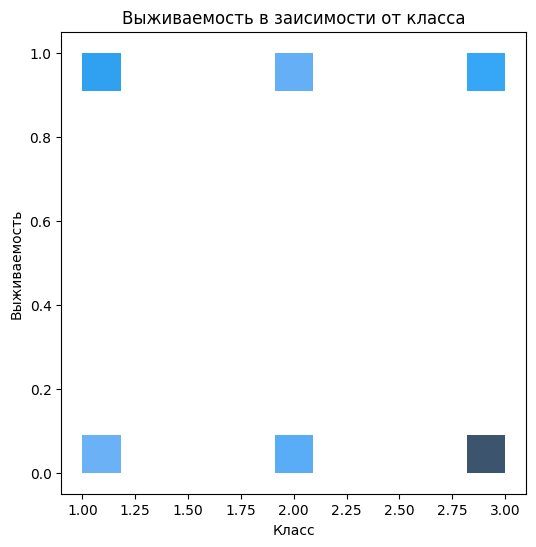

In [25]:
corr_matrix = df['Pclass'].corr(df['Survived'])

print(f'Корреляция между классом и выживаемостью: {corr_matrix:.2f}')


plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='Pclass', y='Survived')
plt.title('Выживаемость в заисимости от класса')
plt.xlabel('Класс')
plt.ylabel('Выживаемость')

plt.show()

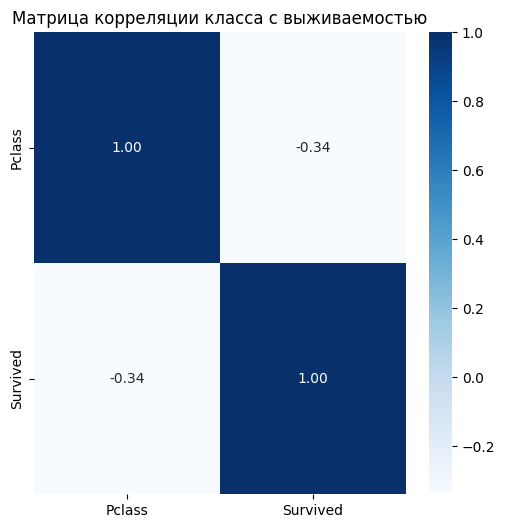

In [26]:
df_corr_first = df[['Pclass', 'Survived']]
corr_matrix = df_corr_first.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",      
    cmap="Blues",   
)
plt.title("Матрица корреляции класса с выживаемостью")
plt.show()

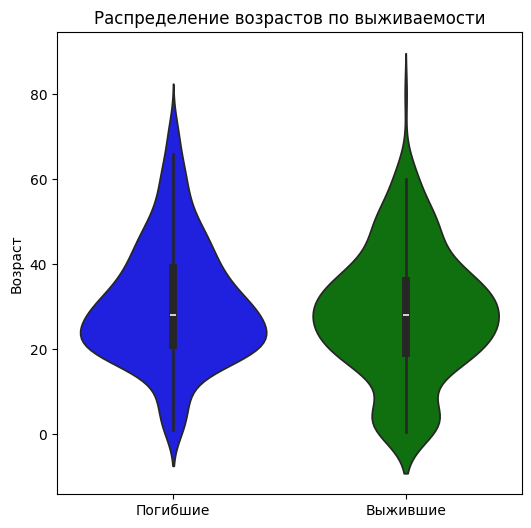

In [28]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df,
               x='Survived',
               y='Age',
               hue='Survived',
               palette={0: 'blue', 1: 'green'},
               legend=False
              )
plt.title('Распределение возрастов по выживаемости')
plt.xticks([0, 1], ['Погибшие', 'Выжившие'])
plt.xlabel('')
plt.ylabel('Возраст')
plt.show()

In [29]:
'''Среди выживших гораздо больше людей младше 20 лет и предел возраста тоже выше, однако, чем выше возраст, тем биыстрее сужается диаграмма.'''

'Среди выживших гораздо больше людей младше 20 лет и предел возраста тоже выше, однако, чем выше возраст, тем биыстрее сужается диаграмма.'

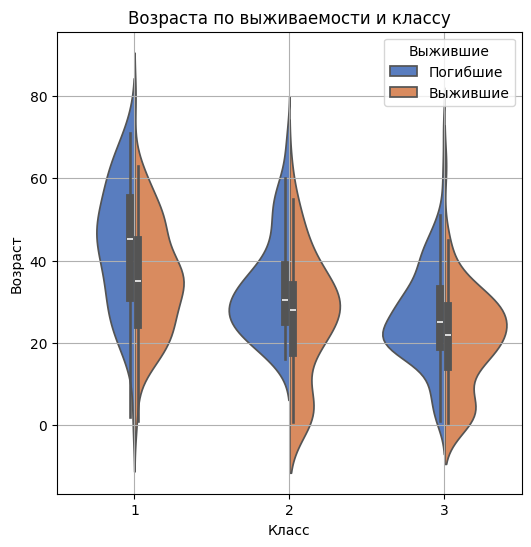

In [30]:
plt.figure(figsize=(6, 6))
ax = sns.violinplot(data=df,
                    x='Pclass',
                    y='Age',
                    hue='Survived',
                    split=True,
                    palette='muted')

plt.title('Возраста по выживаемости и классу')
plt.xlabel('Класс')
plt.ylabel('Возраст')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Погибшие', 'Выжившие'], title='Выжившие', loc='upper right')
plt.grid(True)

plt.show()

In [31]:
'''Больше молодых погибших во втором и 3 классе. Но для возрастов 20 и меньше наоборот гораздо больше выживших именно в этих классах.'''

'Больше молодых погибших во втором и 3 классе. Но для возрастов 20 и меньше наоборот гораздо больше выживших именно в этих классах.'

In [33]:
def get_group_person(passanger):
    age, sex = passanger
    if age <= 16:
        return "child"
    else:
        return sex

In [34]:
df['Group'] = df[['Age', 'Sex']].apply(get_group_person, axis=1)

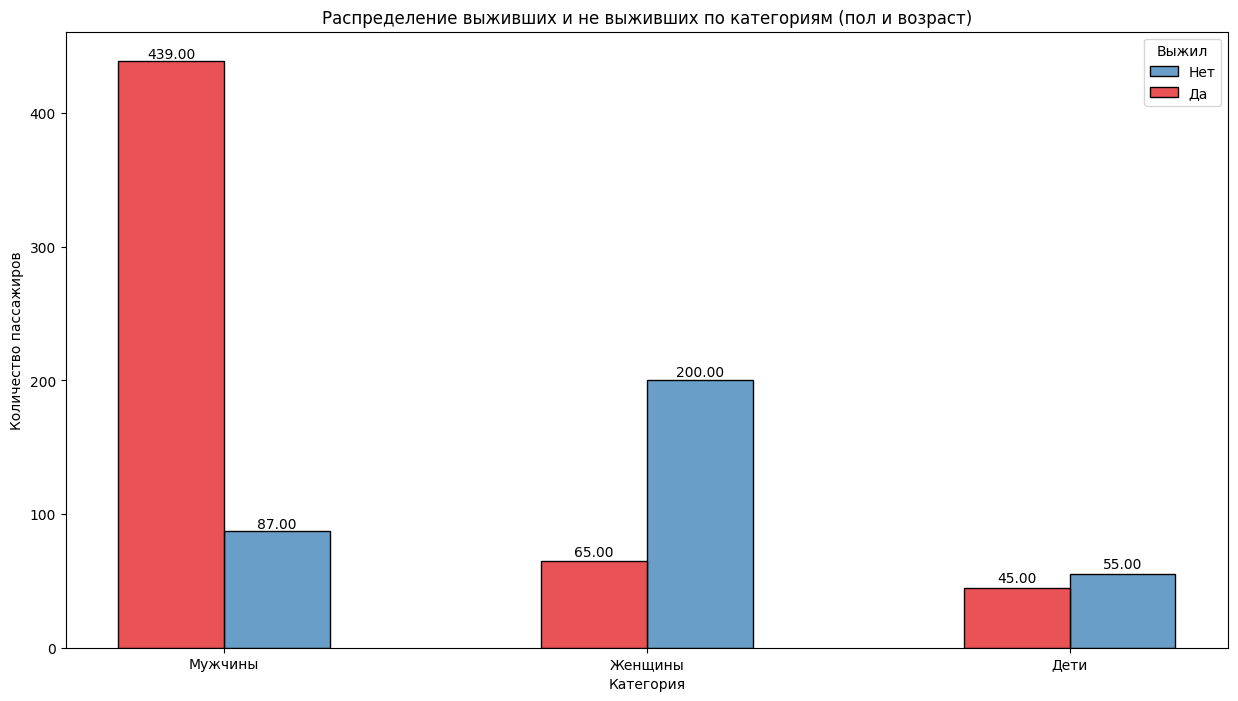

In [41]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data=df, x='Group', hue='Survived', multiple='dodge', palette='Set1', shrink=0.5)
plt.title('Распределение выживших и не выживших по категориям (пол и возраст)')
plt.xlabel('Категория')
plt.ylabel('Количество пассажиров')
plt.xticks(ticks=[0, 1, 2], labels=['Мужчины', 'Женщины', 'Дети'])  # Явное указание меток
plt.legend(title='Выжил', labels=['Нет', 'Да'])  # Уточнение легенды

for p in ax.patches:
    ax.annotate(f'{(p.get_height()):.2f}',
                p.get_x() + (p.get_width() / 2., p.get_height()), 
                ha='center',
                va='bottom')

plt.show()